# imported Necessary libraries

In [31]:
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

%config Completer.use_jedi = False

In [32]:
import h5py

with h5py.File("mask_detection_true.h5", "r") as hf:
    print(hf.keys())

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>


# Haarcascade_frontalface_default.xml is a classifier for frontal face detection. And ensure that both h5 files and this xml file in the same folder

In [33]:
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
mask_detection = tf.keras.models.load_model(
    "mask_detection_true.h5",
    compile=False
)


In [34]:
text_mask = "Mask On"
text_no_mask = "Mask Off"
font = cv2.FONT_HERSHEY_SIMPLEX
scale = 0.8

In [35]:
def predict(image):
    
    face_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face_frame = cv2.resize(face_frame, (224, 224))
    face_frame = img_to_array(face_frame)
    face_frame = np.expand_dims(face_frame, axis=0)
    face_frame =  preprocess_input(face_frame)
    prediction = mask_detection.predict(face_frame)
    
    return prediction[0][0]

# The detector function takes 2 input gray scale image and colorful image. the face classifier returns x,y and width and height. Next we save the prediction in mask variable so that it has probability

In [36]:
def detector(gray_image, frame):
    
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5)
    
    for (x,y,w,h) in faces:

        roi_color = frame[y:y+h, x:x+w]
        mask = predict(roi_color)

        
        if mask > 0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(frame, text =text_mask, org =(x+50,y-100), fontFace =font, fontScale = scale, color =(0,255,0),
            thickness = 2)
        
        elif mask<=0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
            cv2.putText(frame, text =text_no_mask, org =(x+50,y-100), fontFace =font, fontScale = scale , color =(0,0,255),
            thickness = 2)
            
    return frame

# I accessed the camera with video capture. 0 for default webcam or choose anyother value for your prefereed device. Press 'q' to exit the video capture

In [37]:
video_cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = video_cap.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     
    detect = detector(gray_frame, frame)
    
    cv2.imshow("Video", detect)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
video_cap.release()
cv2.destroyAllWindows()

# Output of the Assignment
# Improper Mask: 


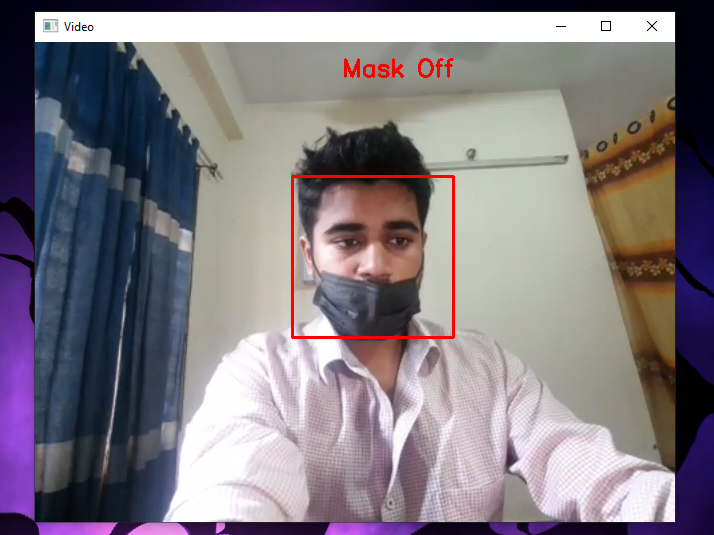

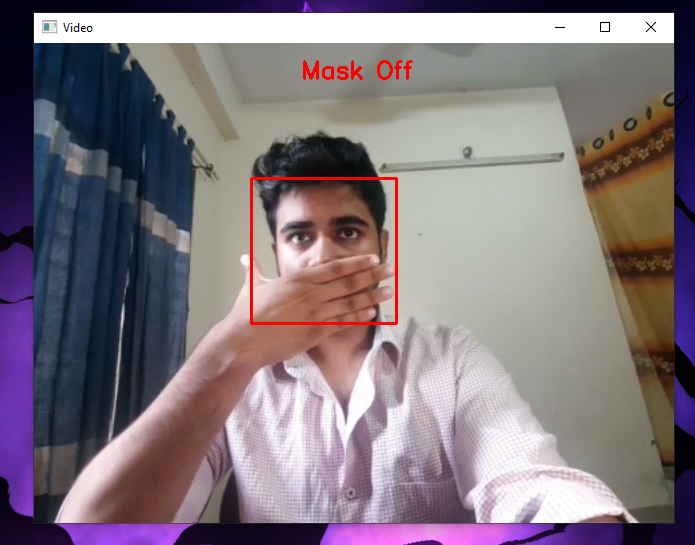

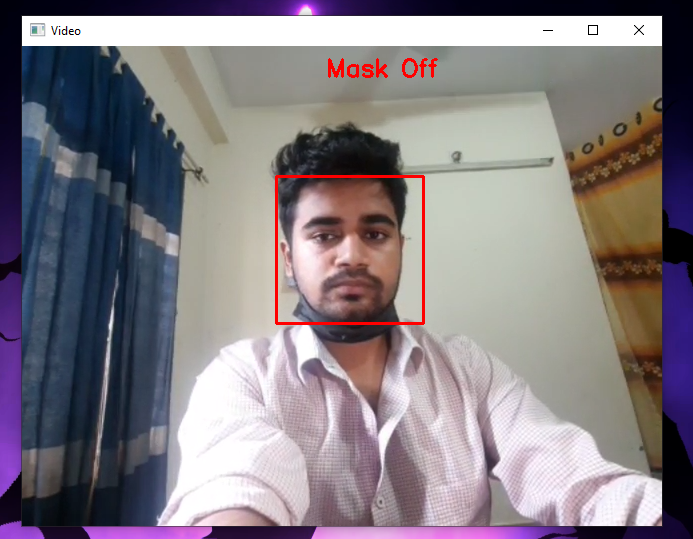

# No Mask Output: 

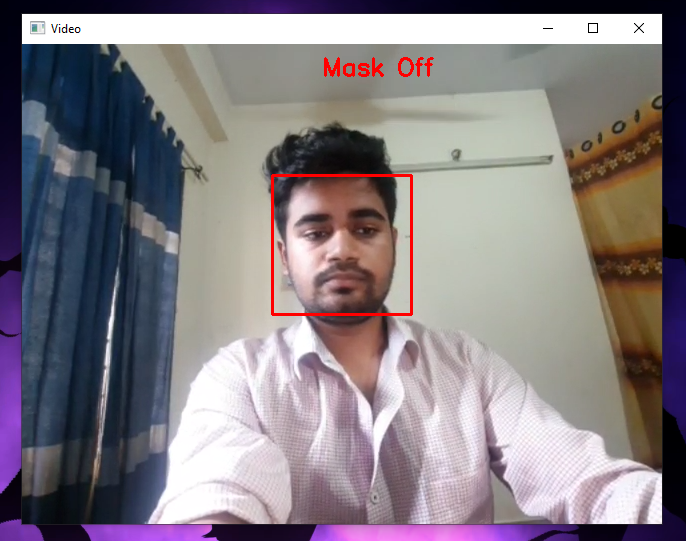

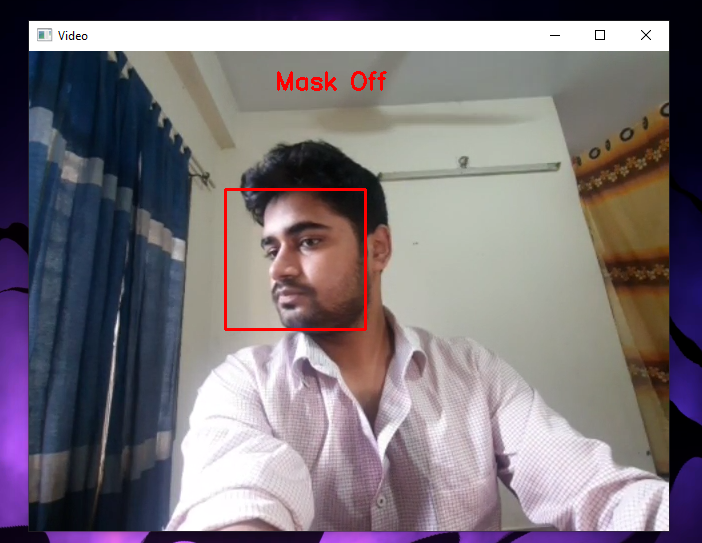

# Proper Mask Output: 

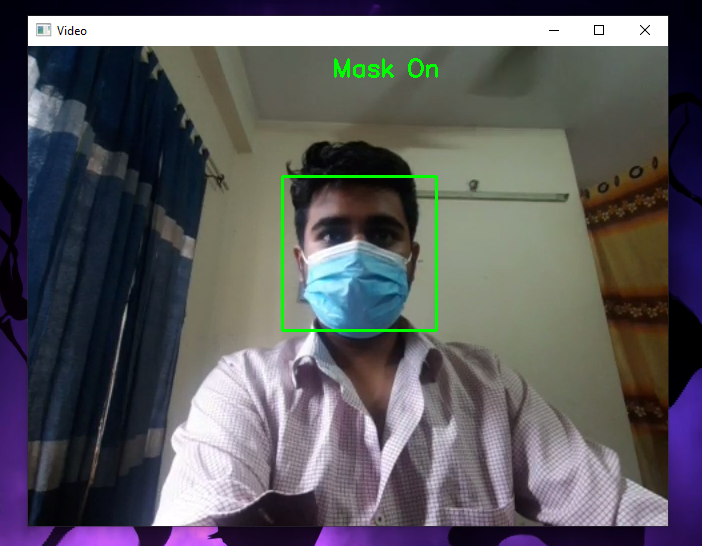

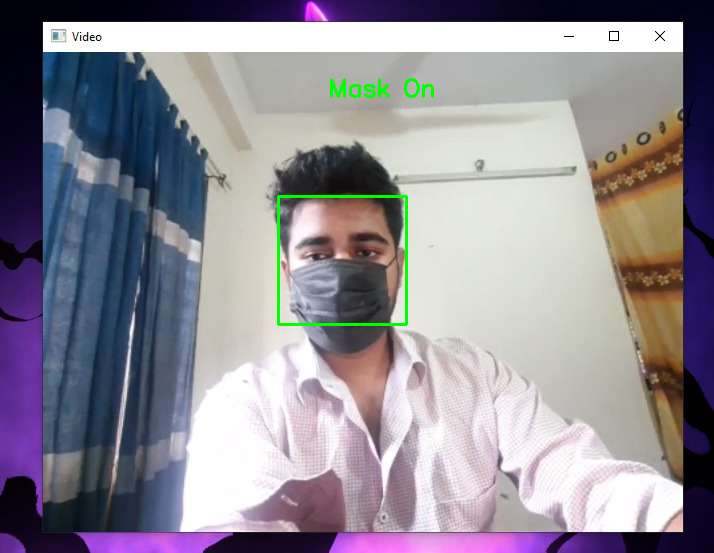